In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv


In [2]:
udemy_original_data = pd.read_csv('../input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv')

In [3]:
udemy_dataset = udemy_original_data.copy()
udemy_dataset.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [4]:
udemy_dataset.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

In [5]:
check_null_discount_price__amount = (udemy_dataset.discount_price__amount.isnull().sum())/(len(udemy_dataset.discount_price__amount))*100
check_null_discount_price__currency = (udemy_dataset.discount_price__currency.isnull().sum())/(len(udemy_dataset.discount_price__currency))*100
check_null_discount_price__price_string = (udemy_dataset.discount_price__price_string.isnull().sum())/(len(udemy_dataset.discount_price__price_string))*100
check_null_price_detail__amount = (udemy_dataset.price_detail__amount.isnull().sum())/(len(udemy_dataset.price_detail__amount))*100
check_null_price_detail__currency= (udemy_dataset.price_detail__currency.isnull().sum())/(len(udemy_dataset.price_detail__currency))*100
check_null_price_detail__price_string  = (udemy_dataset.price_detail__price_string.isnull().sum())/(len(udemy_dataset.price_detail__price_string))*100

print("volume of NaNs of discount_price__amount is " + str(round(check_null_discount_price__amount,2))+"%")
print("volume of NaNs of discount_price__currency is " + str(round(check_null_discount_price__currency,2))+"%")
print("volume of NaNs of discount_price__price_string is " + str(round(check_null_discount_price__price_string,2))+"%")
print("volume of NaNs of price_detail__amount is " + str(round(check_null_price_detail__amount,2))+"%")
print("volume of NaNs of price_detail__currency  is " + str(round(check_null_price_detail__currency,2))+"%")
print("volume of NaNs of price_detail__price_string is " + str(round(check_null_price_detail__price_string,2))+"%")

volume of NaNs of discount_price__amount is 10.31%
volume of NaNs of discount_price__currency is 10.31%
volume of NaNs of discount_price__price_string is 10.31%
volume of NaNs of price_detail__amount is 3.65%
volume of NaNs of price_detail__currency  is 3.65%
volume of NaNs of price_detail__price_string is 3.65%


In [6]:
len(udemy_dataset.index)

13608

In [7]:
udemy_dataset.title.values

array(['The Complete SQL Bootcamp 2020: Go from Zero to Hero',
       'Tableau 2020 A-Z: Hands-On Tableau Training for Data Science',
       'PMP Exam Prep Seminar -  PMBOK Guide 6', ...,
       'Goodwill and Method of Calculating Goodwill (Accountancy)',
       'Poderoso Investidor',
       'Acabou a Previdência e agora? -  Volume 03'], dtype=object)

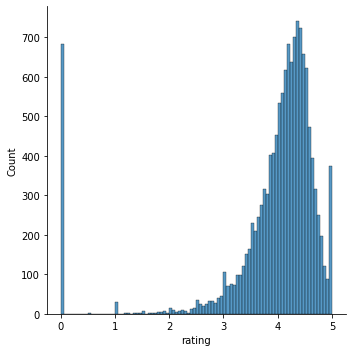

In [8]:
sns.displot(udemy_dataset['rating'])

In [9]:
rating_5 = []
rating_4 = []
rating_3 = []
rating_2 = []
rating_1 = []
rating_0 = []
for i in range(0, len(udemy_dataset.rating.values)-1):
    if udemy_dataset.rating.values[i] == 5.0:
        rating_5.append(udemy_dataset.title.values[i])
    if 4.0 <= udemy_dataset.rating.values[i] < 5.0:
        rating_4.append(udemy_dataset.title.values[i])
    if 3.0 <= udemy_dataset.rating.values[i] < 4.0:
        rating_3.append(udemy_dataset.title.values[i])
    if 2.0 <= udemy_dataset.rating.values[i] < 3.0:
        rating_2.append(udemy_dataset.title.values[i])
    if 1.0 <= udemy_dataset.rating.values[i] < 2.0:
        rating_1.append(udemy_dataset.title.values[i])
    if 0.0 <= udemy_dataset.rating.values[i] < 1.0:
        rating_0.append(udemy_dataset.title.values[i])

### List of 5.0 Courses in Udemy

In [10]:
rating_5

['Advanced Upwork Interviews: A Simple Way to Earn High-Pay!',
 'Price Action: The complete Price Action Masterclass A-Z',
 'New! Raise funds for your innovative business with EU grants',
 'Shipping address and Shipping cost for E-commerce series',
 'Emotional Intelligence Training for Increased Sales',
 'Make Money On Youtube Without Making Videos [2020 Edition]',
 'Persuasion Psychology & Influence | Close the Deal',
 'Energizing Your Powerful Entrepreneurial Mindset',
 'Are You Ready to Start Your Own Preschool?',
 'Exec 901: Introduction to Management with Slimf it Method',
 'The Freelancing Online Business Model - Practical & Honest',
 'Coach your team like a PRO',
 'Quality Management Systems for Operational Excellence',
 'Effective Listening For Business',
 'Module 1: Supply Chain Network Designing',
 'The basics of delivering a public speech',
 'eTribe - People who buy from you again and again',
 'Udemy Instructor Guide To Tracking Your Results (unofficial)',
 'How to reveal pe

In [11]:
def label_graph(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)

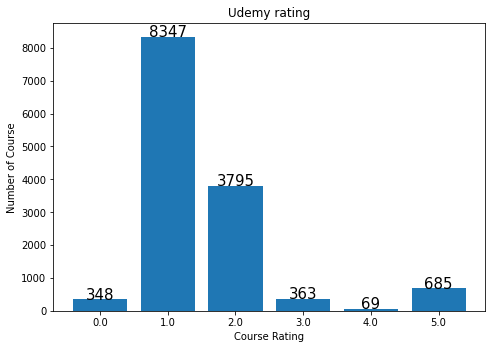

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
udemy_rating_label = ["0.0", "1.0", "2.0", "3.0", "4.0", "5.0"]
udemy_rating_data = [len(rating_5), len(rating_4), len(rating_3), len(rating_2), len(rating_1), len(rating_0)]
ax.bar(udemy_rating_label,udemy_rating_data)
label_graph(ax)
ax.set_ylabel('Number of Course')
ax.set_xlabel('Course Rating')
ax.set_title('Udemy rating')
plt.show()

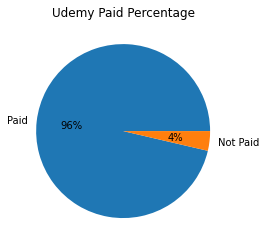

In [13]:
paid_course_data = [len(udemy_dataset[udemy_dataset['is_paid']==True]),
                    len(udemy_dataset[udemy_dataset['is_paid']==False])]
paid_course_labels = ['Paid', 'Not Paid']
plt.title('Udemy Paid Percentage')
plt.pie(paid_course_data, labels = paid_course_labels, autopct='%.0f%%')
plt.show()

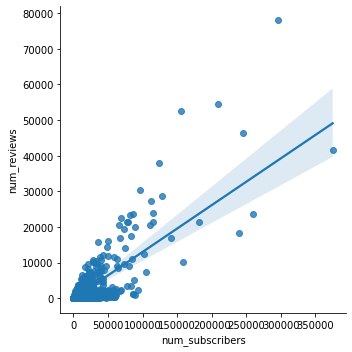

In [14]:
sns.lmplot(x="num_subscribers", y="num_reviews",data =udemy_dataset)

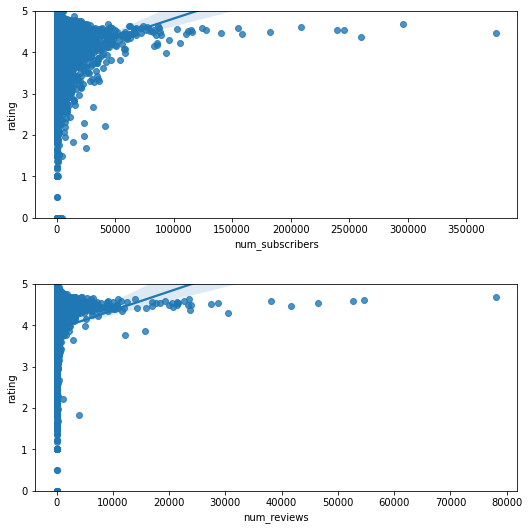

In [15]:
fig, axs = plt.subplots(nrows=2, figsize=(8,8))
g1 = sns.regplot(x="num_subscribers", y="rating",data =udemy_dataset, ax=axs[0])
g2 = sns.regplot(x="num_reviews", y="rating",data =udemy_dataset, ax=axs[1])
g1.set(ylim=(0, 5))
g2.set(ylim=(0, 5))
fig.tight_layout(pad=3.0)

In [16]:
udemy_dataset['created_year'] = udemy_dataset['created'].apply(lambda x: np.int(x[0:4]))
udemy_dataset['published_year'] = udemy_dataset['published_time'].apply(lambda x: np.int(x[0:4]))
udemy_dataset

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_year,published_year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,...,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,...,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,...,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2017,2017
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,...,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,...,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,...,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,...,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,...,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,...,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020


Text(0.5, 1.0, '# of Course over the year')

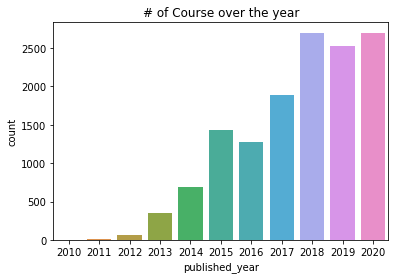

In [17]:
sns.countplot(x= "published_year", data= udemy_dataset).set_title('# of Course over the year')

In [18]:
udemy_dataset_testing = udemy_dataset.copy()
udemy_dataset_testing.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_year,published_year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,...,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,...,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,...,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2017,2017
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,...,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,...,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016


In [19]:
udemy_dataset_testing.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
created_year                       0
published_year                     0
dtype: int64

In [20]:
udemy_dataset_testing = udemy_dataset_testing.drop(['id',
                                                    'title',
                                                    'url',
                                                    'created',
                                                    'published_time',
                                                    'discount_price__currency',
                                                    'discount_price__price_string',
                                                    'price_detail__currency',
                                                    'price_detail__price_string'
                                                   ], axis=1)
udemy_dataset_testing.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,published_year
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,455.0,8640.0,2016,2016
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,455.0,8640.0,2016,2016
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,455.0,8640.0,2017,2017
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,455.0,8640.0,2015,2016
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,455.0,8640.0,2015,2016


In [21]:
udemy_dataset_testing['discount_price__amount']= udemy_dataset_testing['discount_price__amount'].fillna(udemy_dataset_testing['discount_price__amount'].mean())
udemy_dataset_testing['price_detail__amount']= udemy_dataset_testing['price_detail__amount'].fillna(udemy_dataset_testing['price_detail__amount'].mean())
udemy_dataset_testing.isnull().sum()

is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
created_year                    0
published_year                  0
dtype: int64

In [22]:
udemy_dataset_testing['is_paid'] = udemy_dataset_testing['is_paid'].astype(np.int)
udemy_dataset_testing['is_wishlisted'] = udemy_dataset_testing['is_wishlisted'].astype(np.int)

In [23]:
udemy_dataset_testing.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,published_year
0,1,295509,4.66019,4.67874,4.67874,78006,0,84,0,455.0,8640.0,2016,2016
1,1,209070,4.58956,4.60015,4.60015,54581,0,78,0,455.0,8640.0,2016,2016
2,1,155282,4.59491,4.59326,4.59326,52653,0,292,2,455.0,8640.0,2017,2017
3,1,245860,4.54407,4.53772,4.53772,46447,0,338,0,455.0,8640.0,2015,2016
4,1,374836,4.47080,4.47173,4.47173,41630,0,83,0,455.0,8640.0,2015,2016


In [24]:
udemy_dataset_testing.columns

Index(['is_paid', 'num_subscribers', 'avg_rating', 'avg_rating_recent',
       'rating', 'num_reviews', 'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'discount_price__amount',
       'price_detail__amount', 'created_year', 'published_year'],
      dtype='object')

In [25]:
X = udemy_dataset_testing[['is_paid', 'num_subscribers', 'avg_rating', 'avg_rating_recent',
                'num_reviews','is_wishlisted', 'num_published_lectures','num_published_practice_tests', 
                'discount_price__amount','price_detail__amount', 'created_year', 'published_year']]
y = udemy_dataset_testing['rating']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [28]:
lin_reg.intercept_

-4.489741911584133e-13

In [29]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
is_paid,2.110661e-16
num_subscribers,5.700895e-21
avg_rating,1.026199e-16
avg_rating_recent,1.000000e+00
num_reviews,0.000000e+00
is_wishlisted,7.460699e-14
num_published_lectures,-5.897365e-18
num_published_practice_tests,-1.554999e-16
discount_price__amount,-3.699972e-19
price_detail__amount,2.140828e-20


[4.20032 3.85569 3.83743 ... 4.19623 4.08929 4.88945]


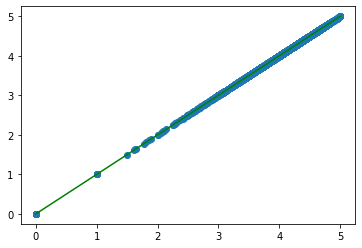

In [30]:
pred = lin_reg.predict(X_test)
print(pred)
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'g')

In [31]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

In [32]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [33]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [34]:
print_evaluate(y_train,train_pred)

MAE: 6.297916282444717e-16
MSE: 7.689716589145999e-31
RMSE: 8.769102912582335e-16
R2 Square 1.0
